# Classification using Scikit-learn

This notebook introduces basic clustering algorithm in Python using Scikit-learn module. At first, we have to import necessary libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

The first step is to generate data needed for the process. Specify number of clusters to be generated by specifying `no_clusters` variable. Then, a feature matrix is created, as well as the labels.

Feature matrix shape: (200, 2)
Labels shape: (200,)


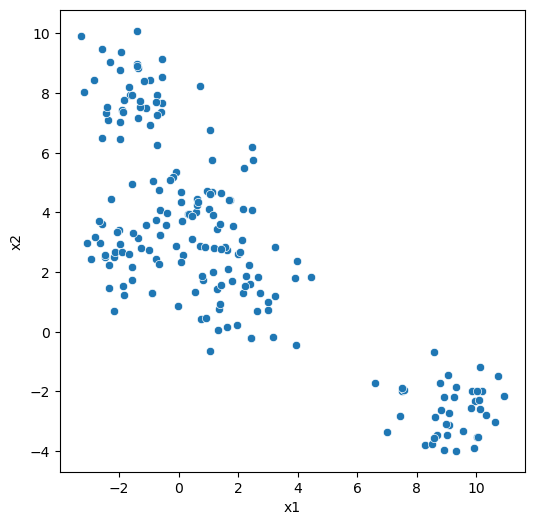

In [2]:
no_clusters = 5

# Generate data
X, Y = make_blobs(
    n_samples=200,
    centers=no_clusters,
    n_features=2,
    random_state=0
)

# Print some information about the data
print(f'Feature matrix shape: {X.shape}')
print(f'Labels shape: {Y.shape}')

# Plot the data
plt.figure(figsize=(6, 6))
sns.scatterplot(x=X[:,0], y=X[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(False)
plt.show()

### Train/test split

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=18)

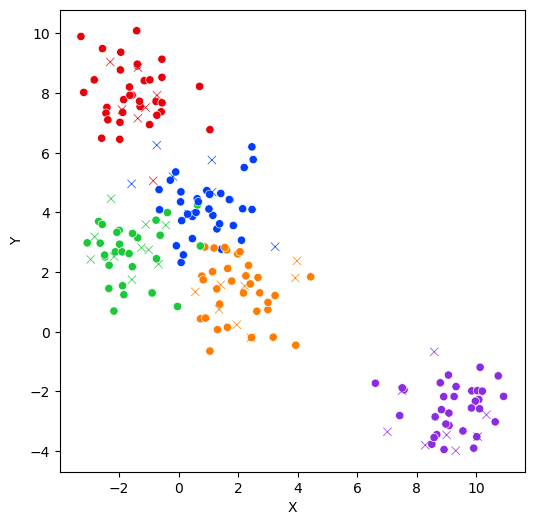

In [4]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=Y_train, palette='bright')
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=Y_test, marker='x', palette='bright')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend().set_visible(False)
plt.grid(False)
plt.show()

In [5]:
from sklearn.linear_model import LogisticRegression

# Define the model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, Y_train)

# Make predictions
Yhat = logreg.predict(X_test)

# Print the accuracy
print(f"Accuracy for the train set: {logreg.score(X_train, Y_train)}")
print(f"Accuracy for the test set: {logreg.score(X_test, Y_test)}")

Accuracy for the train set: 0.93125
Accuracy for the test set: 0.9


In [6]:
# Convert data to a .pd DataFrame
data = {}
predictions = pd.DataFrame(
    {
        'X1': X_test[:,0],
        'X2': X_test[:,1],
        'Y' : Y_test,
        'Yhat' : Yhat
    }
)
misclassified = predictions[Yhat != Y_test]
correct = predictions[Yhat == Y_test]
print(misclassified)

          X1        X2  Y  Yhat
2  -0.849209  5.062867  3     0
11 -0.730000  6.254563  0     3
15  3.246025  2.849422  0     1
27 -1.576720  4.957406  0     2
